In [5]:
%matplotlib widget
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
from draw3d import *

In [7]:
import vectors as V

import math

In [ ]:
def to_rad(angle):
	return angle / 180 * math.pi

Draw the 3D arrow and point representing the coordinates (–1, –2, 2) as well as the dashed box that makes the arrow look 3D. Do this draw- ing by hand for practice, but from now on, we’ll use Python to draw for us.

In [ ]:
def ex31():
	v2 = (-1, -2, 2)
	v1 = (2, 2, 2)
	
	draw3d(Points3D(v1,v2), Arrow3D(v1), Arrow3D(v2), Box3D(*v1), Box3D(*v2))
ex31()


## Ex 3.2
There are exactly eight 3D vectors whose coordi- nates are all either +1 or –1. For instance, (1, –1, 1) is one of these. Plot all of these eight vectors as points. Then figure out how to connect them with line seg- ments using Segment3D objects to form the outline of a cube.

In [ ]:
from itertools import permutations, combinations, product, tee, pairwise, chain

var = (1, -1)


def ex32():
    pp = [(x, y, z) for x in var for z in var for y in var]

    ss = chain([Segment3D((1, y, z), (-1, y, z)) for y in var for z in var],
               [Segment3D((x, 1, z), (x, -1, z)) for x in var for z in var],
               [Segment3D((x, y, 1), (x, y, -1)) for x in var for y in var])
    draw3d(Points3D(*pp), *ss)


ex32()


In [ ]:
u = (1,2,2)
V.length(u)
v = V.scale(7/3, u)
V.length(v)
V.dot(u,v)

v_rev = V.scale(-1, v)
V.dot(u, v_rev)

u_list = [(1,2,2), (2,1,2), (2,2,1)]



In [ ]:

def get_dot_prod(u_len, v_len, angle):
	uv_len_prod = u_len * v_len
	cos = math.cos(to_rad(angle))
	uv_dot_prod = cos * uv_len_prod
	return uv_dot_prod

u_len = 3.61
v_len = 1.44
angle = 101.3
get_dot_prod(u_len, v_len, angle)


## Ex 3.3
Draw (4, 0, 3) and (–1, 0, 1) as Arrow3D objects, such that they are placed tip-to-tail in both orders in 3D. What is their vector sum?

In [ ]:
a = (4,0,3)
b = (-1,0,1)
c = V.add(a,b)

vv = [
	Arrow3D(a, color=red),
	Arrow3D(c, a, color=blue),
	Arrow3D(b, color=blue),
	Arrow3D(c, b, color=red)
]
draw3d(*vv)

## Exercise 3.5—Mini Project 
The following comprehension creates a list of 24 Python vectors:
from math import sin, cos, pi
vs = [(sin(pi*t/6), cos(pi*t/6), 1.0/3) for t in range(0,24)]
What is the sum of the 24 vectors? Draw all 24 of them tip-to-tail as Arrow3D objects.

In [ ]:
from math import sin, cos, pi

vs = [(sin(pi*t/6), cos(pi*t/6), 1.0/3) for t in range(0,24)]
s = V.add(*vs)
print(s)
arrows = [Segment3D(vs[x], vs[x+1]) for x in range(-1, len(vs)-1)]
lines = [Arrow3D(x, (0, 0, 0)) for x in vs]
rs = (0, 0, 0)
hel = []
for v in vs:
	tmp = rs
	rs = V.add(rs, v)
	hel.append(Arrow3D(rs, tmp))
	

draw3d(*(lines + arrows + hel))

### Exercise 3.9—Mini Project 
The coordinates 3, 4, 12 in any order create a vector of length 13, a whole number. This is unusual because most numbers are not perfect squares, so the square root in the length formula typically returns an irrational number. Find a different triple of whole numbers that define coordinates of a vector with a whole number length.

In [ ]:
		
is_int = lambda i: i == int(i)
l = [T for T in combinations_with_replacement(range(1,100), 3) if is_int(V.length(T))]


V.length((30, 50, 75))
len(l)

In [ ]:
from itertools import combinations_with_replacement, product, combinations, permutations


print("product: ", list(product('ABC', 'ABC', 'ABC')))
print("permutations: ", list(permutations('ABC', 3)))
print("combinations: ", list(combinations('ABC', 1)))
print("combinations with rep: ", list(combinations_with_replacement(range(3), 3)))

def iter_triples(limit=100):

	for x in range(1, limit):
		for y in range(1, x+1):
			for z in range(1, y+1):
				yield (x, y, z)
print("len of triples: ", len(list(iter_triples(10))))
print("len of permutations: ", len(list(permutations(range(1, 10), 3))))
print("len of combinations: ", len(list(combinations(range(1, 10), 3))))
print("len of combinations with rep: ", len(list(combinations_with_replacement(range(1, 10), 3))))



Find a vector in the same direction as (–1, –1, 2) but which has length 1.

In [ ]:
v1 = (-1, -1, 2)
V.length(v1)
v2 = V.scale(1/V.length(v1), v1)

V.length(v2)

Exercise 3.17—Mini Project Find the angle between (3, 4) and (4, 3) by con- verting them to polar coordinates and taking the difference of the angles. The answer is

In [ ]:
u = (3,4)
v = (4,3)
up = V.to_polar(u)
vp = V.to_polar(v)
diff = up[1] - vp[1]
diff

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


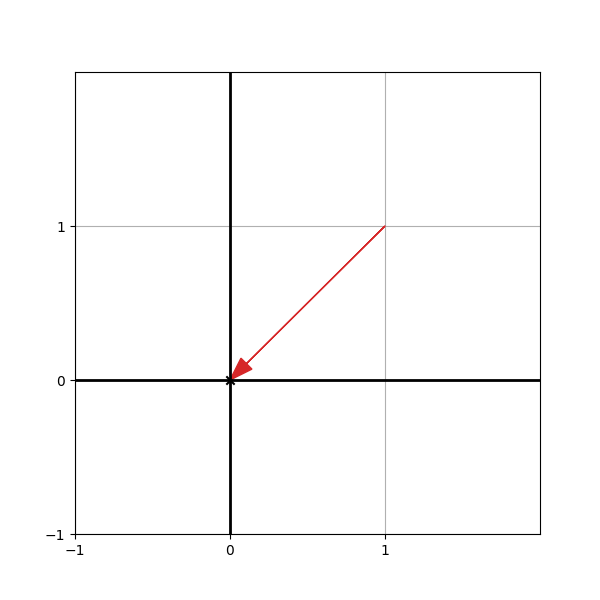

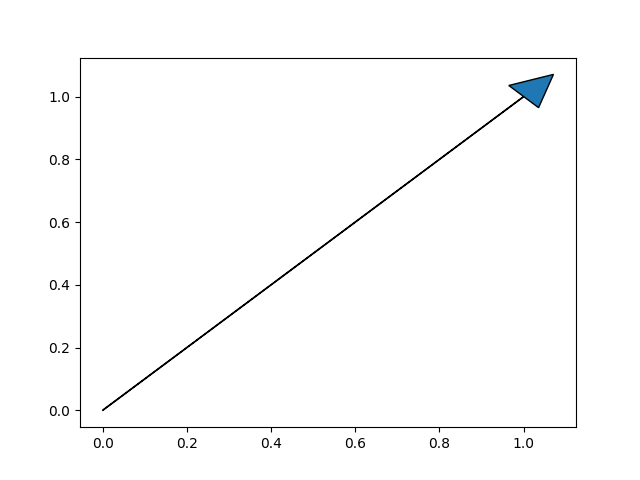

In [4]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from matplotlib.pyplot import xlim, ylim
from draw2d import Arrow2D, draw2d

arr = Arrow2D((0, 0), (1, 1))
fig, ax = plt.subplots()
ax.arrow(0, 0, 1, 1, head_width=0.1, head_length=0.1)
draw2d(arr)


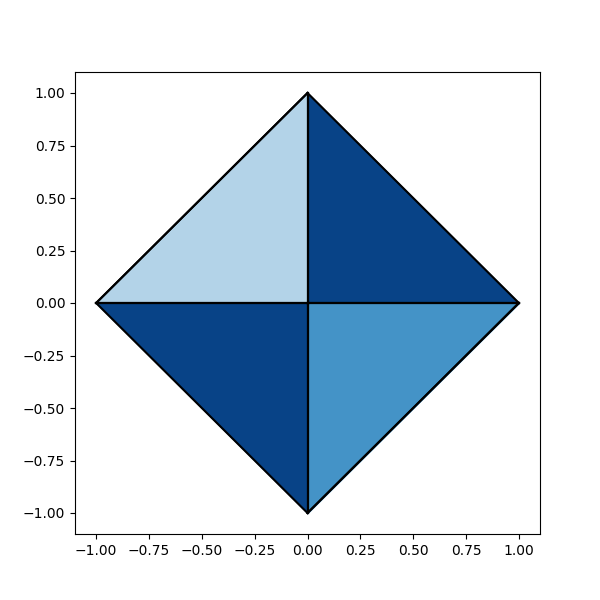

In [21]:
import matplotlib
from matplotlib.pyplot import grid
from draw2d import Points2D, draw2d, Polygon2D
from colors import black


def component2D(v, direction):
	return V.dot(v, direction) /V.length(direction)

def projection2D(v, directionX = (1, 0, 0), directionY = (0, 1, 0)):
	return (component2D(v, directionX), component2D(v, directionY))

def face_normal(v1, v2, v3):
	return V.cross(V.subtract(v2, v1), V.subtract(v3, v1))
	

def unit(v):
	return V.scale(1./V.length(v), v)

blues = matplotlib.cm.get_cmap('Blues')

def render(faces, light_source=(1,2,3), color_map=blues, lines=None):
	unit_light = unit(light_source)
	polygons = []
	for f in faces:
		normal = face_normal(*f)
		f2d = list(map(projection2D, f))
		unit_normal = unit(normal)
		color_alignment = V.dot(unit_normal, unit_light)
		if color_alignment > 0:
			color = color_map(color_alignment)
			polygon = Polygon2D(*f2d, fill=color, color=lines)
			polygons.append(polygon)
	draw2d(*polygons, grid=None, origin=False, axes=False)


octahedron = [
	[(0, 0, 1), (1, 0, 0), (0, 1, 0)],
	[(0,0,1), (0,1,0), (-1,0,0)],
	[(0,0, 1), (-1,0,0), (0,-1,0)],
	[(0,0,1), (0,-1,0), (1,0,0)],
	[(0,0, -1), (1,0,0), (0,1,0)],
	[(0,0, -1), (0,1,0), (-1,0,0)],
	[(0,0, -1), (-1,0,0), (0,-1,0)],
	[(0,0,-1), (0,-1,0), (1,0,0)]
]

render(octahedron, lines=black)